<a href="https://colab.research.google.com/github/Jdasanja/masters_thesis_final/blob/main/ML_Algo_4_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas for reading and displaying local file
import pandas as pd

In [ ]:
# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Jdasanja/masers_thesis/main/processed.cleveland.data'
df = pd.read_csv(url, header=None)

# Add column names (based on standard attribute names for the Cleveland dataset)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'num']

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)


# Display first few rows of the uploaded file with headers
print("First few rows of the uploaded file with column headers:")
print(df.head())


First few rows of the uploaded file with column headers:
             age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
patient_id                                                                  
1           63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
2           67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
3           67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
4           37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5           41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

            oldpeak  slope   ca thal  num  
patient_id                                 
1               2.3    3.0  0.0  6.0    0  
2               1.5    2.0  3.0  3.0    2  
3               2.6    2.0  2.0  7.0    1  
4               3.5    3.0  0.0  3.0    0  
5               1.4    1.0  0.0  3.0    0  


In [ ]:
# Create a new dataframe with a new binary column based on the values in 'num'
df_binary_col = df.copy()
df_binary_col['num_binary'] = df_binary_col['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

df_binary_col = df_binary_col.drop('num', axis=1)


In [ ]:
## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
import numpy as np

## Replace question marks with NaN
df_binary_col.replace('?', np.nan, inplace=True)

## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
## Drop rows with NaN values
df_binary_col.dropna(inplace=True)

## Verify if any null values remain
df_binary_col.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print("Test Set Shape (X):", X_test.shape)
print("Test Set Shape (y):", y_test.shape)


Test Set Shape (X): (60, 13)
Test Set Shape (y): (60,)


In [ ]:
# Explore the training set
print("DataFrame.info():")
X_train.info()

print("\nDataFrame.describe():")
print(X_train.describe())


DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 56 to 269
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       237 non-null    float64
 1   sex       237 non-null    float64
 2   cp        237 non-null    float64
 3   trestbps  237 non-null    float64
 4   chol      237 non-null    float64
 5   fbs       237 non-null    float64
 6   restecg   237 non-null    float64
 7   thalach   237 non-null    float64
 8   exang     237 non-null    float64
 9   oldpeak   237 non-null    float64
 10  slope     237 non-null    float64
 11  ca        237 non-null    object 
 12  thal      237 non-null    object 
dtypes: float64(11), object(2)
memory usage: 25.9+ KB

DataFrame.describe():
              age         sex          cp    trestbps        chol         fbs  \
count  237.000000  237.000000  237.000000  237.000000  237.000000  237.000000   
mean    54.772152    0.675105    3.185654  132.270042  24

<h1> Transformation Test 1 </h1>
<br>
Logarithmic Transformation of for Resting Blood Pressure and Cholesterol. Squared Transformation of Maximum Heart Rate

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
#pip install --upgrade scikit-learn


In [ ]:
# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope']),
        ("onehot", OneHotEncoder(sparse=False), ['ca', 'thal'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformedtest = ct.fit_transform(X_train)
X_test_transformedtest = ct.transform(X_test)

<h1>Random Forrest Classifier on Transformation 1</h1>

Accuracy of the model: 0.85
F1 Score of the model: 0.8491129259363558
Precision: 0.8560267857142857
Recall: 0.85


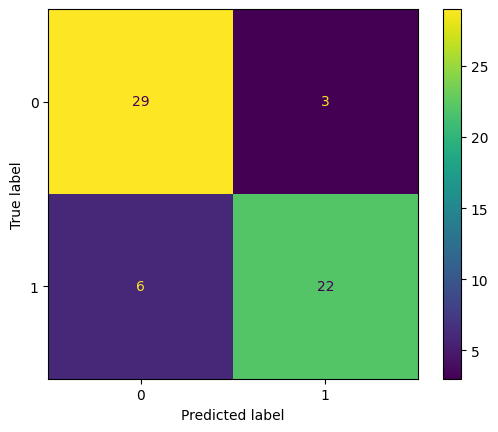

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformedtest, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformedtest)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
### K-means Crossfold Validation


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)
clf_model = clf.fit(X_train_transformedtest, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.75       0.75       0.75       0.91666667]
Mean Accuracy: 0.8
Cross-Validation Results (Precision): [0.75       0.75       0.83333333 0.66666667 0.875     ]
Mean Precision: 0.775
Cross-Validation Results (Recall): [0.75       0.6        0.71428571 0.8        1.        ]
Mean Recall: 0.7728571428571429
Cross-Validation Results (F1 Score): [0.75       0.66666667 0.76923077 0.72727273 0.93333333]
Mean F1 Score: 0.7693006993006992


<h3> Parameter Grid Search </h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Define the parameter grid, including random_state
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [2, 3, 5, 10, 20],
    'random_state': [0, 42, 123, 2024]  # Different random states for testing reproducibility
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

# Perform grid search with multiple scoring metrics
grid_search_rf = GridSearchCV(
    estimator=clf,
    param_grid=param_grid_rf,
    scoring=scoring,
    refit='f1_weighted',  # Select the best model based on F1-Weighted
    cv=3,  # 3-fold cross-validation
    verbose=1,  # To monitor progress
    n_jobs=-1  # Use all available processors for faster computation
)

# Fit the grid search
grid_search_rf.fit(X_train_transformedtest, y_train)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Output the best parameters and cross-validated scores
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated F1-Weighted:", grid_search_rf.best_score_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters: {'max_depth': 2, 'n_estimators': 50, 'random_state': 123}
Best Cross-Validated F1-Weighted: 0.8375861986504232


<h1>Transformation 1: Random Forrest Classifier with Optimized Parameters </h1>

Accuracy of the model: 0.8333333333333334
F1 Score of the model: 0.8318250377073907
Precision: 0.84375
Recall: 0.8333333333333334


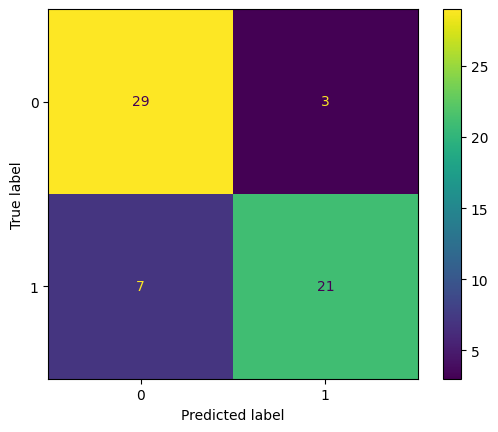

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=123, max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_transformedtest, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformedtest)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=123,max_depth=2)
clf_model = clf.fit(X_train_transformedtest, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.75       0.75       0.75       0.91666667 0.91666667]
Mean Accuracy: 0.8166666666666667
Cross-Validation Results (Precision): [0.66666667 0.75       0.75       0.83333333 0.875     ]
Mean Precision: 0.775
Cross-Validation Results (Recall): [0.5        0.6        0.85714286 1.         1.        ]
Mean Recall: 0.7914285714285715
Cross-Validation Results (F1 Score): [0.57142857 0.66666667 0.8        0.90909091 0.93333333]
Mean F1 Score: 0.7761038961038962


<h1>XGB Classifier on Transformation 1</h1>

In [ ]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_transformedtest, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformedtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
#pip install scikit-learn==1.0.2


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5
xgb_classifier_model = xgb_classifier.fit(X_train_transformedtest, y_train)
cross_val_results_xgb = cross_val_score(xgb_classifier_model, X_test_transformedtest, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_xgb}')
print(f'Mean Accuracy: {cross_val_results_xgb.mean()}')

# Custom scoring functions
precision_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test_xgb}')
print(f'Mean Precision: {precision_test_xgb.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test_xgb}')
print(f'Mean Recall: {recall_test_xgb.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test_xgb}')
print(f'Mean F1 Score: {f1_test_xgb.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.66666667 0.58333333 0.75       0.91666667]
Mean Accuracy: 0.75
Cross-Validation Results (Precision): [0.75       0.66666667 0.625      0.66666667 0.875     ]
Mean Precision: 0.7166666666666666
Cross-Validation Results (Recall): [0.75       0.4        0.71428571 0.8        1.        ]
Mean Recall: 0.7328571428571429
Cross-Validation Results (F1 Score): [0.75       0.5        0.66666667 0.72727273 0.93333333]
Mean F1 Score: 0.7154545454545455


<h3> Parameter Grid Search </h3>


In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report, accuracy_score

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of boosting rounds
    'max_depth': [2, 4, 6],                  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate (step size)
    'subsample': [0.8, 1.0],                 # Fraction of samples for each boosting round
    'colsample_bytree': [0.8, 1.0]           # Fraction of features for each boosting round
}

# Perform Grid Search using GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_transformedtest, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the final model with the best parameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train_transformedtest, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test_transformedtest)

# Evaluate the final model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Model Performance on Test Set:")
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Cross-validation metrics for the final model
precision = cross_val_score(best_xgb, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall = cross_val_score(best_xgb, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1 = cross_val_score(best_xgb, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

print("\nCross-Validation Results (Precision):", precision)
print("Mean Precision:", precision.mean())

print("Cross-Validation Results (Recall):", recall)
print("Mean Recall:", recall.mean())

print("Cross-Validation Results (F1 Score):", f1)
print("Mean F1 Score:", f1.mean())


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8270042194092827

Final Model Performance on Test Set:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60


Cross-Validation Results (Precision): [0.75       0.66666667 0.66666667 0.66666667 0.875     ]
Mean Precision: 0.7249999999999999
Cross-Validation Results (Recall): [0.75       0.4        0.57142857 0.8        1.        ]
Mean Recall: 0.7042857142857143
Cross-Validation Results (F1 Score): [0.75       0.5        0.61538462 0.72727273 0.93333333]
Mean F1 Score: 0.7051981

<h1> Transformation 1: XGB Classifier: Optimized Parameters </h1>

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8)

# Train the model
xgb_classifier.fit(X_train_transformedtest, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformedtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))




Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5
xgb_classifier_model = xgb_classifier.fit(X_train_transformedtest, y_train)
cross_val_results_xgb = cross_val_score(xgb_classifier_model, X_test_transformedtest, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_xgb}')
print(f'Mean Accuracy: {cross_val_results_xgb.mean()}')

# Custom scoring functions
precision_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test_xgb}')
print(f'Mean Precision: {precision_test_xgb.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test_xgb}')
print(f'Mean Recall: {recall_test_xgb.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test_xgb}')
print(f'Mean F1 Score: {f1_test_xgb.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.75       0.75       0.75       0.91666667]
Mean Accuracy: 0.8
Cross-Validation Results (Precision): [0.75       0.75       0.75       0.66666667 0.875     ]
Mean Precision: 0.7583333333333333
Cross-Validation Results (Recall): [0.75       0.6        0.85714286 0.8        1.        ]
Mean Recall: 0.8014285714285714
Cross-Validation Results (F1 Score): [0.75       0.66666667 0.8        0.72727273 0.93333333]
Mean F1 Score: 0.7754545454545454


<h2>Ensemble Method</h2>


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
# Random Forest
#rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=123,max_depth=2)
# XGBoost
xgb_clf = XGBClassifier(
random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8
)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

In [ ]:
# Fit the ensemble model with data
ensemble_clf.fit(X_train_transformedtest, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformedtest)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:")
print(report)

Accuracy: 0.8
F1 Score: 0.7965714285714287
Precision: 0.8100478468899522
Recall: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(
    ensemble_clf,
    X_test_transformedtest,
    y_test,
    cv=kf,
    scoring=scoring,
    return_train_score=False
)

# Output Cross-Validation Results
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.4f}")

# Fit the model on the full training set
ensemble_clf.fit(X_train_transformedtest, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformedtest)

# Evaluate on Test Set
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
report = classification_report(y_test, y_pred_ensemble)

# Output Test Set Results
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(report)

Cross-Validation Results:
Mean Accuracy: 0.7833
Mean Precision: 0.7910
Mean Recall: 0.7833
Mean F1 Score: 0.7795

Test Set Results:
Accuracy: 0.8000
F1 Score: 0.7966
Precision: 0.8100
Recall: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy
cross_val_results_accuracy = cross_val_score(ensemble_clf, X_test_transformedtest, y_test, cv=kf, scoring='accuracy')
print(f'Cross-Validation Results (Accuracy): {cross_val_results_accuracy}')
print(f'Mean Accuracy: {cross_val_results_accuracy.mean()}')

# Precision
precision_results = cross_val_score(ensemble_clf, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(precision_score, average='weighted', zero_division=0))
print(f'Cross-Validation Results (Precision): {precision_results}')
print(f'Mean Precision: {precision_results.mean()}')

# Recall
recall_results = cross_val_score(ensemble_clf, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(recall_score, average='weighted'))
print(f'Cross-Validation Results (Recall): {recall_results}')
print(f'Mean Recall: {recall_results.mean()}')

# F1 Score
f1_results = cross_val_score(ensemble_clf, X_test_transformedtest, y_test, cv=kf, scoring=make_scorer(f1_score, average='weighted'))
print(f'Cross-Validation Results (F1 Score): {f1_results}')
print(f'Mean F1 Score: {f1_results.mean()}')


Cross-Validation Results (Accuracy): [0.83333333 0.66666667 0.75       0.75       0.91666667]
Mean Accuracy: 0.7833333333333333
Cross-Validation Results (Precision): [0.83333333 0.66666667 0.76388889 0.76388889 0.92708333]
Mean Precision: 0.7909722222222222
Cross-Validation Results (Recall): [0.83333333 0.66666667 0.75       0.75       0.91666667]
Mean Recall: 0.7833333333333333
Cross-Validation Results (F1 Score): [0.83333333 0.64583333 0.75174825 0.75174825 0.91481481]
Mean F1 Score: 0.779495596995597


<h1><strong> Transformation Test 2 </strong></h1>
<ol>
<li>Logarithmic Transformation for Resting Blood Pressure and Cholesterol.</li>
<li>Squared Transformation of Maximum Heart Rate</li>
<li> <strong>combination of oldpeak and slope </strong></li> </ol>

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse=False), ['ca', 'thal', 'cp'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

<h2> Random Forrest Classifier on Transformation 2 </h2>

Accuracy of the model: 0.8333333333333334
F1 Score of the model: 0.8318250377073907
Precision: 0.84375
Recall: 0.8333333333333334


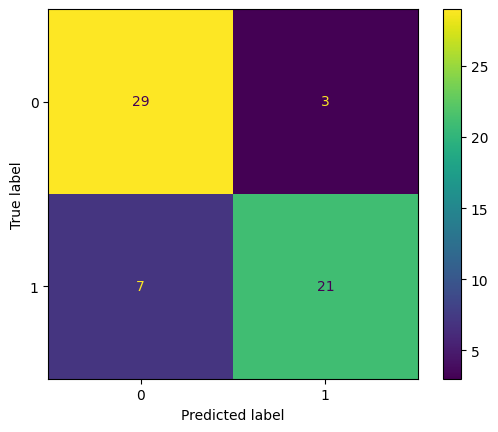

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=1,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=123, max_depth=3)
clf_model = clf.fit(X_train_transformed, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.66666667 0.75       0.91666667 0.91666667]
Mean Accuracy: 0.8166666666666667
Cross-Validation Results (Precision): [0.75       0.66666667 0.75       1.         0.875     ]
Mean Precision: 0.8083333333333332
Cross-Validation Results (Recall): [0.75       0.4        0.85714286 0.8        1.        ]
Mean Recall: 0.7614285714285713
Cross-Validation Results (F1 Score): [0.75       0.5        0.8        0.88888889 0.93333333]
Mean F1 Score: 0.7744444444444444


<h3> Parameter Grid Search </h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Define the parameter grid, including random_state
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [2, 3, 5, 10, 20],
    'random_state': [0, 42, 123, 2024]  # Different random states for testing reproducibility
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

# Perform grid search with multiple scoring metrics
grid_search_rf = GridSearchCV(
    estimator=clf,
    param_grid=param_grid_rf,
    scoring=scoring,
    refit='f1_weighted',  # Select the best model based on F1-Weighted
    cv=3,  # 3-fold cross-validation
    verbose=1,  # To monitor progress
    n_jobs=-1  # Use all available processors for faster computation
)

# Fit the grid search
grid_search_rf.fit(X_train_transformed, y_train)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Output the best parameters and cross-validated scores
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated F1-Weighted:", grid_search_rf.best_score_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters: {'max_depth': 2, 'n_estimators': 200, 'random_state': 42}
Best Cross-Validated F1-Weighted: 0.8342253925725879


<h1>Transformation 2: Random Forrest Classifier with Optimized Parameters </h1>

Accuracy of the model: 0.8333333333333334
F1 Score of the model: 0.8304761904761906
Precision: 0.855654761904762
Recall: 0.8333333333333334


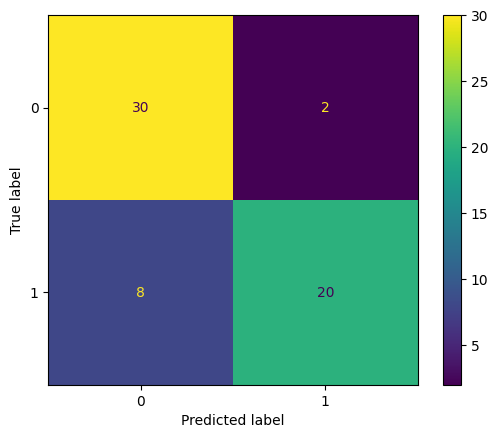

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()


print(classification_report(y_test, y_pred))

In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=2)
clf_model = clf.fit(X_train_transformed, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.83333333 1.         0.83333333 0.91666667]
Mean Accuracy: 0.8833333333333334
Cross-Validation Results (Precision): [1.         1.         1.         0.71428571 0.875     ]
Mean Precision: 0.9178571428571429
Cross-Validation Results (Recall): [0.5 0.6 1.  1.  1. ]
Mean Recall: 0.82
Cross-Validation Results (F1 Score): [0.66666667 0.75       1.         0.83333333 0.93333333]
Mean F1 Score: 0.8366666666666667


<h2>XGB Forrest Classifier on Transformation 2</h2>

In [ ]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
num_folds = 5
xgb_classifier_model = xgb_classifier.fit(X_train_transformed, y_train)
cross_val_results_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_xgb}')
print(f'Mean Accuracy: {cross_val_results_xgb.mean()}')

# Custom scoring functions
precision_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test_xgb}')
print(f'Mean Precision: {precision_test_xgb.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test_xgb}')
print(f'Mean Recall: {recall_test_xgb.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test_xgb}')
print(f'Mean F1 Score: {f1_test_xgb.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.66666667 0.66666667 0.75       0.91666667]
Mean Accuracy: 0.7666666666666666
Cross-Validation Results (Precision): [0.75       0.66666667 0.8        0.66666667 0.875     ]
Mean Precision: 0.7516666666666667
Cross-Validation Results (Recall): [0.75       0.4        0.57142857 0.8        1.        ]
Mean Recall: 0.7042857142857143
Cross-Validation Results (F1 Score): [0.75       0.5        0.66666667 0.72727273 0.93333333]
Mean F1 Score: 0.7154545454545455


<h3> Parameter Grid Search </h3>

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report, accuracy_score

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of boosting rounds
    'max_depth': [2, 4, 6],                  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate (step size)
    'subsample': [0.8, 1.0],                 # Fraction of samples for each boosting round
    'colsample_bytree': [0.8, 1.0]           # Fraction of features for each boosting round
}

# Perform Grid Search using GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_transformed, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the final model with the best parameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test_transformed)

# Evaluate the final model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Model Performance on Test Set:")
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Cross-validation metrics for the final model
precision = cross_val_score(best_xgb, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall = cross_val_score(best_xgb, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1 = cross_val_score(best_xgb, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

print("\nCross-Validation Results (Precision):", precision)
print("Mean Precision:", precision.mean())

print("Cross-Validation Results (Recall):", recall)
print("Mean Recall:", recall.mean())

print("Cross-Validation Results (F1 Score):", f1)
print("Mean F1 Score:", f1.mean())

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8354430379746836

Final Model Performance on Test Set:
Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60


Cross-Validation Results (Precision): [0.75       0.75       0.75       0.66666667 0.875     ]
Mean Precision: 0.7583333333333333
Cross-Validation Results (Recall): [0.75       0.6        0.85714286 0.8        1.        ]
Mean Recall: 0.8014285714285714
Cross-Validation Results (F1 Score): [0.75       0.66666667 0.8        0.72727273 0.93333333]
Mean F1 Score: 0.7754545

<h1> Transformation 2: XGB Classifier: Optimized Parameters </h1>

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8)

# Train the model
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



In [ ]:
num_folds = 5
xgb_classifier_model = xgb_classifier.fit(X_train_transformed, y_train)
cross_val_results_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_xgb}')
print(f'Mean Accuracy: {cross_val_results_xgb.mean()}')

# Custom scoring functions
precision_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test_xgb}')
print(f'Mean Precision: {precision_test_xgb.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test_xgb}')
print(f'Mean Recall: {recall_test_xgb.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test_xgb}')
print(f'Mean F1 Score: {f1_test_xgb.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.75       0.75       0.75       0.91666667]
Mean Accuracy: 0.8
Cross-Validation Results (Precision): [0.75       0.75       0.75       0.66666667 0.875     ]
Mean Precision: 0.7583333333333333
Cross-Validation Results (Recall): [0.75       0.6        0.85714286 0.8        1.        ]
Mean Recall: 0.8014285714285714
Cross-Validation Results (F1 Score): [0.75       0.66666667 0.8        0.72727273 0.93333333]
Mean F1 Score: 0.7754545454545454


<h3> Ensemble Method </h3>

In [ ]:
# Random Forest
#rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=2)
# XGBoost
xgb_clf = XGBClassifier(
random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8
)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

In [ ]:
# Fit the ensemble model with data
ensemble_clf.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformed)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(report)

Accuracy: 0.8
Precision: 0.8100478468899522
Recall: 0.8
F1 Score: 0.7965714285714287

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(
    ensemble_clf,
    X_test_transformed,
    y_test,
    cv=kf,
    scoring=scoring,
    return_train_score=False
)

# Output Cross-Validation Results
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.4f}")

# Fit the model on the full training set
ensemble_clf.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformed)

# Evaluate on Test Set
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
report = classification_report(y_test, y_pred_ensemble)

# Output Test Set Results
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(report)

Cross-Validation Results:
Mean Accuracy: 0.8167
Mean Precision: 0.8365
Mean Recall: 0.8167
Mean F1 Score: 0.8103

Test Set Results:
Accuracy: 0.8000
F1 Score: 0.7966
Precision: 0.8100
Recall: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy
cross_val_results_accuracy = cross_val_score(ensemble_clf, X_test_transformed, y_test, cv=kf, scoring='accuracy')
print(f'Cross-Validation Results (Accuracy): {cross_val_results_accuracy}')
print(f'Mean Accuracy: {cross_val_results_accuracy.mean()}')

# Precision
precision_results = cross_val_score(ensemble_clf, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='weighted', zero_division=0))
print(f'Cross-Validation Results (Precision): {precision_results}')
print(f'Mean Precision: {precision_results.mean()}')

# Recall
recall_results = cross_val_score(ensemble_clf, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='weighted'))
print(f'Cross-Validation Results (Recall): {recall_results}')
print(f'Mean Recall: {recall_results.mean()}')

# F1 Score
f1_results = cross_val_score(ensemble_clf, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='weighted'))
print(f'Cross-Validation Results (F1 Score): {f1_results}')
print(f'Mean F1 Score: {f1_results.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.75       0.75       0.83333333 0.91666667]
Mean Accuracy: 0.8166666666666668
Cross-Validation Results (Precision): [0.83333333 0.825      0.76388889 0.83333333 0.92708333]
Mean Precision: 0.8365277777777778
Cross-Validation Results (Recall): [0.83333333 0.75       0.75       0.83333333 0.91666667]
Mean Recall: 0.8166666666666668
Cross-Validation Results (F1 Score): [0.83333333 0.71848739 0.75174825 0.83333333 0.91481481]
Mean F1 Score: 0.8103434256375432


<h1><strong>Transformation Test 3 </h1></strong>
<br>
<ol>
<li>Logarithmic Transformation for Resting Blood Pressure and Cholesterol.</li>
<li>Squared Transformation of Maximum Heart Rate</li>
<li> combination of oldpeak and slope </li>
<li> <strong>GenderBasedFeatureEngineering: creates new features that capture potential differences between genders (represented by the sex column) in the dataset. It computes gender-normalized features, interaction terms, and gender-specific indicators.</strong></li>
</ol>

In [ ]:
# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy


# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy


# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])


# Custom Transformer for Gender-Based Feature Engineering
class GenderBasedFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()

        # Gender-Normalized Features
        X_copy['thalach_norm_gender'] = X_copy['thalach'] / X_copy.groupby('sex')['thalach'].transform('mean')
        X_copy['chol_norm_gender'] = X_copy['chol'] / X_copy.groupby('sex')['chol'].transform('mean')

        # Gender-Interaction Terms
        X_copy['sex_thalach'] = X_copy['sex'] * X_copy['thalach']
        X_copy['sex_oldpeak'] = X_copy['sex'] * X_copy['oldpeak']

        # Gender-Specific Indicators
        X_copy['thalach_above_median_gender'] = (X_copy['thalach'] > X_copy.groupby('sex')['thalach'].transform('median')).astype(int)
        X_copy['chol_above_median_gender'] = (X_copy['chol'] > X_copy.groupby('sex')['chol'].transform('median')).astype(int)

        return X_copy


# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("gender_features", GenderBasedFeatureEngineering(), list(X_train.columns)),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse=False), ['ca', 'thal'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


<h2> Random Forrest Classifier Transformation 3 </h2>

Accuracy of the model: 0.8333333333333334
F1 Score of the model: 0.8327721661054994
Precision: 0.8363095238095238
Recall: 0.8333333333333334


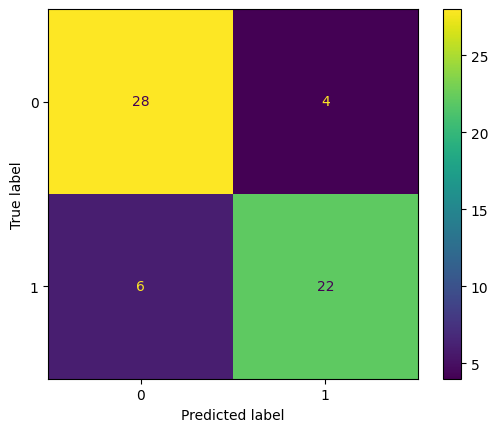

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42,max_depth=5)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=5)
clf_model = clf.fit(X_train_transformed, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.75       0.66666667 0.75       0.83333333 0.91666667]
Mean Accuracy: 0.7833333333333333
Cross-Validation Results (Precision): [0.66666667 0.66666667 0.83333333 0.71428571 0.875     ]
Mean Precision: 0.7511904761904762
Cross-Validation Results (Recall): [0.5        0.4        0.71428571 1.         1.        ]
Mean Recall: 0.7228571428571429
Cross-Validation Results (F1 Score): [0.57142857 0.5        0.76923077 0.83333333 0.93333333]
Mean F1 Score: 0.7214652014652015


<h2> Parameter Grid Search </h2>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# Create a Random Forest classifier
clf = RandomForestClassifier()

# Define the parameter grid, including random_state
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [2, 3, 5, 10, 20],
    'random_state': [0, 42, 123, 2024]  # Different random states for testing reproducibility
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

# Perform grid search with multiple scoring metrics
grid_search_rf = GridSearchCV(
    estimator=clf,
    param_grid=param_grid_rf,
    scoring=scoring,
    refit='f1_weighted',  # Select the best model based on F1-Weighted
    cv=3,  # 3-fold cross-validation
    verbose=1,  # To monitor progress
    n_jobs=-1  # Use all available processors for faster computation
)

# Fit the grid search
grid_search_rf.fit(X_test_transformed, y_test)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Output the best parameters and cross-validated scores
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated F1-Weighted:", grid_search_rf.best_score_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters: {'max_depth': 3, 'n_estimators': 50, 'random_state': 2024}
Best Cross-Validated F1-Weighted: 0.8487574681653629


<h1>Transformation 3: Random Forrest Classifier with Optimized Parameters </h1>

Accuracy of the model: 0.8333333333333334
F1 Score of the model: 0.8318250377073907
Precision: 0.84375
Recall: 0.8333333333333334


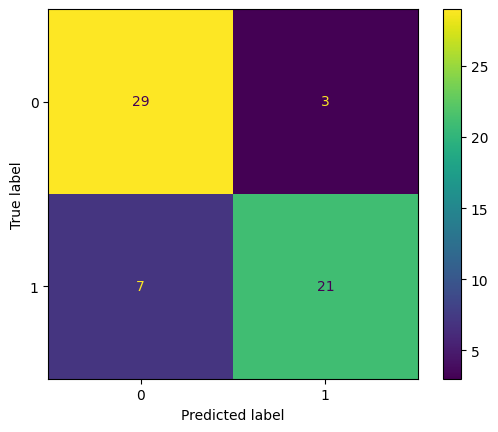

In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=2024,max_depth=3)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=2024,max_depth=3)
clf_model = clf.fit(X_train_transformed, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.66666667 0.75       0.75       0.91666667]
Mean Accuracy: 0.7833333333333333
Cross-Validation Results (Precision): [0.75       0.66666667 0.75       0.66666667 0.875     ]
Mean Precision: 0.7416666666666666
Cross-Validation Results (Recall): [0.75       0.4        0.85714286 0.8        1.        ]
Mean Recall: 0.7614285714285713
Cross-Validation Results (F1 Score): [0.75       0.5        0.8        0.72727273 0.93333333]
Mean F1 Score: 0.742121212121212


<h2> XGB Classifier Transformation 3 </h3>

In [ ]:
#pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model with the PCA-transformed data
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
#!pip install --upgrade xgboost

In [ ]:
# !pip install scikit-learn==1.3.0

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5
xgb_classifier_model = xgb_classifier.fit(X_train_transformed, y_train)
cross_val_results_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_xgb}')
print(f'Mean Accuracy: {cross_val_results_xgb.mean()}')

# Custom scoring functions
precision_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test_xgb}')
print(f'Mean Precision: {precision_test_xgb.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test_xgb}')
print(f'Mean Recall: {recall_test_xgb.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test_xgb}')
print(f'Mean F1 Score: {f1_test_xgb.mean()}')


Cross-Validation Results (Accuracy): [0.83333333 0.66666667 0.66666667 0.83333333 0.91666667]
Mean Accuracy: 0.7833333333333333
Cross-Validation Results (Precision): [0.75       0.66666667 0.8        0.8        0.875     ]
Mean Precision: 0.7783333333333333
Cross-Validation Results (Recall): [0.75       0.4        0.57142857 0.8        1.        ]
Mean Recall: 0.7042857142857143
Cross-Validation Results (F1 Score): [0.75       0.5        0.66666667 0.8        0.93333333]
Mean F1 Score: 0.7300000000000001


<h2> Parameter Grid Search </h2>

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of boosting rounds
    'max_depth': [2, 4, 6],                  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate (step size)
    'subsample': [0.8, 1.0],                 # Fraction of samples for each boosting round
    'colsample_bytree': [0.8, 1.0]           # Fraction of features for each boosting round
}

# Perform Grid Search using GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_transformed, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8227848101265822


In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.8)

# Train the model with the PCA-transformed data
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5
xgb_classifier_model = xgb_classifier.fit(X_train_transformed, y_train)
cross_val_results_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_xgb}')
print(f'Mean Accuracy: {cross_val_results_xgb.mean()}')

# Custom scoring functions
precision_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test_xgb}')
print(f'Mean Precision: {precision_test_xgb.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test_xgb}')
print(f'Mean Recall: {recall_test_xgb.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test_xgb}')
print(f'Mean F1 Score: {f1_test_xgb.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.66666667 0.66666667 0.75       0.91666667]
Mean Accuracy: 0.7666666666666666
Cross-Validation Results (Precision): [0.75       0.66666667 0.8        0.66666667 0.875     ]
Mean Precision: 0.7516666666666667
Cross-Validation Results (Recall): [0.75       0.4        0.57142857 0.8        1.        ]
Mean Recall: 0.7042857142857143
Cross-Validation Results (F1 Score): [0.75       0.5        0.66666667 0.72727273 0.93333333]
Mean F1 Score: 0.7154545454545455


<h1> Ensemble Method </h1>

In [ ]:
# Random Forest
#rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=2024,max_depth=3)
# XGBoost
xgb_clf = XGBClassifier(random_state=42, colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.8)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

In [ ]:
# Fit the ensemble model with data
ensemble_clf.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformed)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(report)

Accuracy: 0.85
Precision: 0.8525714285714286
Recall: 0.85
F1 Score: 0.8491129259363558

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(
    ensemble_clf,
    X_test_transformed,
    y_test,
    cv=kf,
    scoring=scoring,
    return_train_score=False
)

# Output Cross-Validation Results
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.4f}")

# Fit the model on the full training set
ensemble_clf.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformed)

# Evaluate on Test Set
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
report = classification_report(y_test, y_pred_ensemble)

# Output Test Set Results
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(report)

Cross-Validation Results:
Mean Accuracy: 0.7667
Mean Precision: 0.7893
Mean Recall: 0.7667
Mean F1 Score: 0.7609

Test Set Results:
Accuracy: 0.8500
F1 Score: 0.8491
Precision: 0.8526
Recall: 0.8500

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



<h1> Male vs. Female test </h1>

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Filter using the original X_test DataFrame to get indices for males and females
male_indices = X_test['sex'] == 1
female_indices = X_test['sex'] == 0

# Use these indices to split the transformed data and y_test
X_test_male = X_test[male_indices]
y_test_male = y_test[male_indices]

X_test_female = X_test[female_indices]
y_test_female = y_test[female_indices]

# Verify the splits
print("Male Test Set Shape (X):", X_test_male.shape)
print("Male Test Set Shape (y):", y_test_male.shape)
print("Female Test Set Shape (X):", X_test_female.shape)
print("Female Test Set Shape (y):", y_test_female.shape)


Male Test Set Shape (X): (41, 13)
Male Test Set Shape (y): (41,)
Female Test Set Shape (X): (19, 13)
Female Test Set Shape (y): (19,)


<strong><h1>Experiment 2 Transformation </h1></strong>

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse=False), ['ca', 'thal', 'cp'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_female_transformed = ct.transform(X_test_female)
X_test_male_transformed = ct.transform(X_test_male)

<h1> Random Forest Classifier test with optimized parameters for Female Population: Transformation 2 </h1>

Accuracy of the model: 0.9473684210526315
F1 Score of the model: 0.9429027113237639
Precision: 0.9649122807017543
Recall: 0.9473684210526315


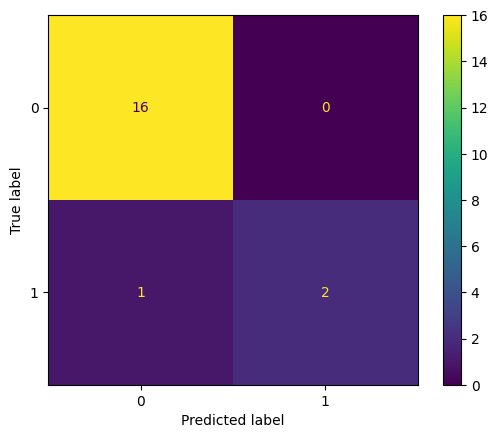

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.67      0.80         3

    accuracy                           0.95        19
   macro avg       0.97      0.83      0.88        19
weighted avg       0.95      0.95      0.94        19



In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_female_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_female, y_pred)
f1 = f1_score(y_test_female, y_pred, average='weighted')
precision = precision_score(y_pred, y_test_female, average="weighted")
recall = recall_score(y_pred, y_test_female, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test_female, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test_female, y_pred))

<h1> Random Forest Classifier test with optimized parameters for Male Population: Transformation 2 </h1>

Accuracy of the model: 0.7804878048780488
F1 Score of the model: 0.7831245880026367
Precision: 0.799390243902439
Recall: 0.7804878048780488


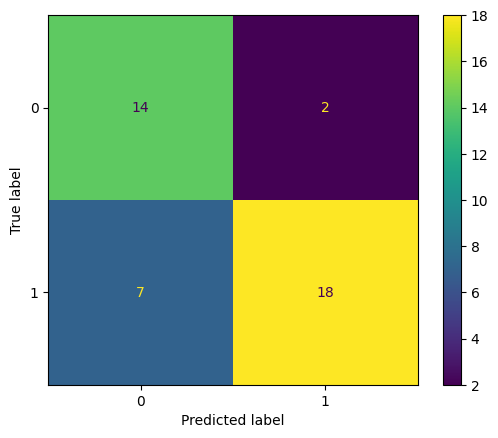

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        16
           1       0.90      0.72      0.80        25

    accuracy                           0.78        41
   macro avg       0.78      0.80      0.78        41
weighted avg       0.81      0.78      0.78        41



In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_male_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_male, y_pred)
f1 = f1_score(y_test_male, y_pred, average='weighted')
precision = precision_score(y_pred, y_test_male, average="weighted")
recall = recall_score(y_pred, y_test_male, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test_male, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test_male, y_pred))

<h1> Ensemble method for Transformation 2: Test for female population </h2>

In [ ]:
# Random Forest
#rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=2)
# XGBoost
xgb_clf = XGBClassifier(
random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8
)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

In [ ]:
# Fit the ensemble model with data
ensemble_clf.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_female_transformed)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test_female, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test_female, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test_female, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test_female, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test_female, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(report)

Accuracy: 0.8947368421052632
Precision: 0.8947368421052632
Recall: 0.8947368421052632
F1 Score: 0.8947368421052632

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.67      0.67      0.67         3

    accuracy                           0.89        19
   macro avg       0.80      0.80      0.80        19
weighted avg       0.89      0.89      0.89        19



<h1> Ensemble method for Transformation 2: Test for male population </h2>

In [ ]:
# Fit the ensemble model with data
ensemble_clf.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_male_transformed)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test_male, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test_male, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test_male, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test_male, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test_male, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(report)

Accuracy: 0.7560975609756098
Precision: 0.7939082740109699
Recall: 0.7560975609756098
F1 Score: 0.7587233049363985

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        16
           1       0.89      0.68      0.77        25

    accuracy                           0.76        41
   macro avg       0.77      0.78      0.75        41
weighted avg       0.79      0.76      0.76        41



<h1> Data Adjustment of Cleveland Dataset for Regional Performance Comparison </h1>
<p> Removing Thal, Ca </p>

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse=False), ['cp'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

<h1> Random Forest Classifier test with optimized parameters for Adjusted Cleveland Dataset: Transformation 2 </h1>

Accuracy of the model: 0.7166666666666667
F1 Score of the model: 0.7162703962703962
Precision: 0.7178571428571429
Recall: 0.7166666666666667


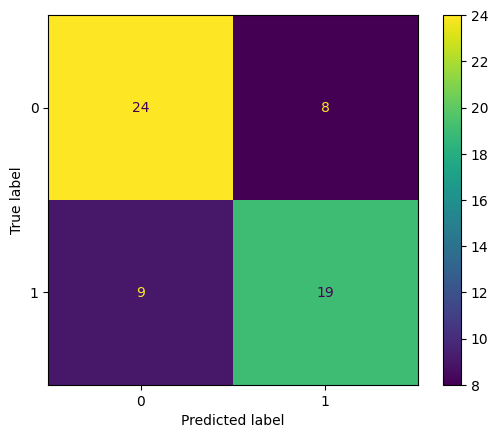

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        32
           1       0.70      0.68      0.69        28

    accuracy                           0.72        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)
clf_model = clf.fit(X_train_transformed, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.66666667 0.75       0.75       0.91666667]
Mean Accuracy: 0.7833333333333333
Cross-Validation Results (Precision): [1.         1.         0.83333333 0.66666667 0.875     ]
Mean Precision: 0.875
Cross-Validation Results (Recall): [0.5        0.2        0.71428571 0.8        1.        ]
Mean Recall: 0.6428571428571429
Cross-Validation Results (F1 Score): [0.66666667 0.33333333 0.76923077 0.72727273 0.93333333]
Mean F1 Score: 0.6859673659673658


<h1> Ensemble Method test with optimized parameters for Adjusted Cleveland Dataset: Transformation 2 </h1>

In [ ]:
# Random Forest
#rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)
# XGBoost
xgb_clf = XGBClassifier(
random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=50, subsample=0.8
)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

In [ ]:
# Fit the ensemble model with data
ensemble_clf.fit(X_train_transformedtest, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformedtest)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:")
print(report)

Accuracy: 0.8
F1 Score: 0.7965714285714287
Precision: 0.8100478468899522
Recall: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(
    ensemble_clf,
    X_test_transformedtest,
    y_test,
    cv=kf,
    scoring=scoring,
    return_train_score=False
)

# Output Cross-Validation Results
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.4f}")

# Fit the model on the full training set
ensemble_clf.fit(X_train_transformedtest, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformedtest)

# Evaluate on Test Set
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
report = classification_report(y_test, y_pred_ensemble)

# Output Test Set Results
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(report)

Cross-Validation Results:
Mean Accuracy: 0.7667
Mean Precision: 0.7791
Mean Recall: 0.7667
Mean F1 Score: 0.7625

Test Set Results:
Accuracy: 0.8000
F1 Score: 0.7966
Precision: 0.8100
Recall: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60

